### Mall Segmentation Study
This purpose of this study is to explore the given data and use clustering techniques for further analysis. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../input/Mall_Customers.csv')
list(df)

pd.options.mode.chained_assignment = None 

In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


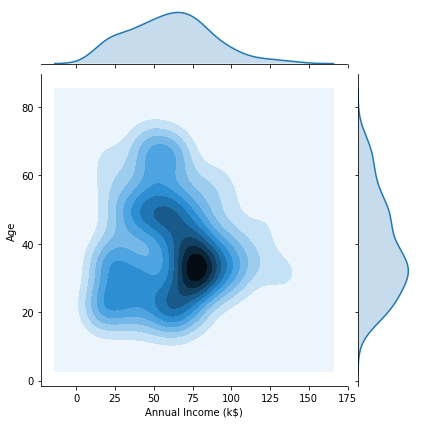

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
sb.jointplot(x='Annual Income (k$)',y='Age',data=df,kind="kde")

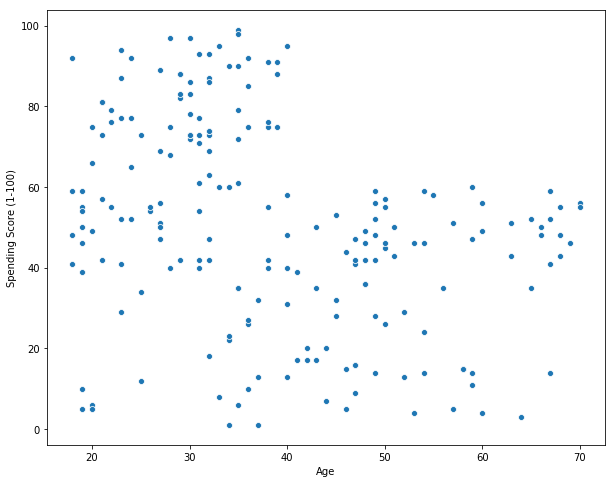

In [4]:
sb.scatterplot(x='Age',y='Spending Score (1-100)',data=df)

It appears mall-goers below the average age have the highest spending scores and older folks' scores are ~40 points lower. 

In [5]:
F = df[df.Gender == 'Female']
np.mean(F)

CustomerID                97.562500
Age                       38.098214
Annual Income (k$)        59.250000
Spending Score (1-100)    51.526786
dtype: float64

In [6]:
M = df[df.Gender == 'Male']
np.mean(M)

CustomerID                104.238636
Age                        39.806818
Annual Income (k$)         62.227273
Spending Score (1-100)     48.511364
dtype: float64

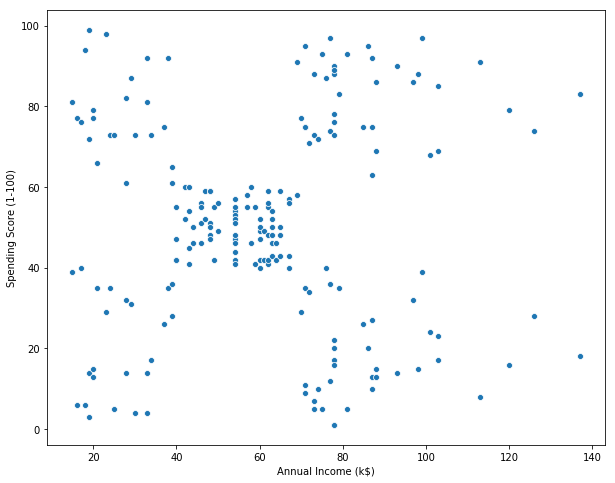

In [7]:
sb.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

The spending score groups are distinct when plotting against annual income. We will use KMeans to assign each cluster to a group based on annual income.  

In [8]:
features = ['Annual Income (k$)','Spending Score (1-100)']
X = df[features]

kmeans = KMeans(n_clusters=5,random_state=13).fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

X['labels'] = labels

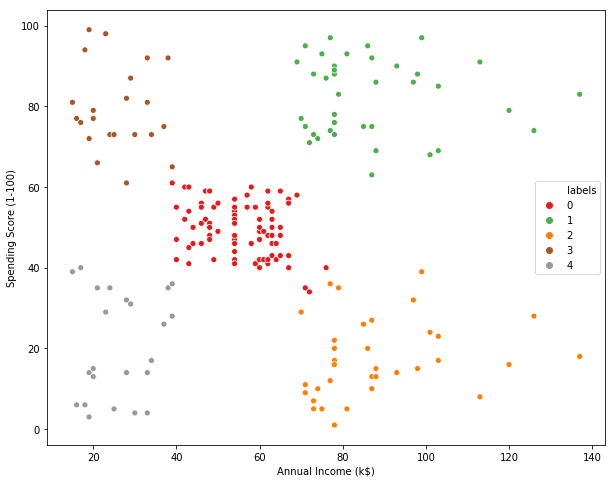

In [9]:
sb.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data = X,hue='labels',palette="Set1",legend="full")

There's a couple observations that appear to be mislabeled between groups 0 and 2. All other observations are labeled accordingly. 

In [10]:
features = ['Age','Spending Score (1-100)']
X = df[features]

bandwidth = estimate_bandwidth(X,quantile=0.20)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(X)

labels = meanshift.labels_

X['labels'] = labels

By playing with the quantile value you can can increase or decrease the number of labels. Setting the quantile value to 0.20 yielded an interpretable grouping. 

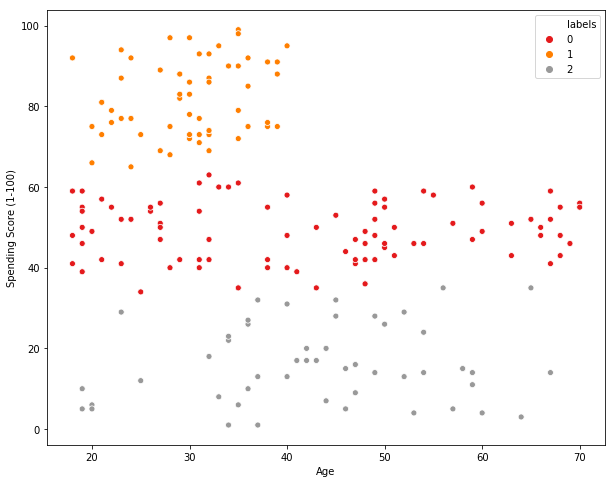

In [11]:
sb.scatterplot(x='Age',y='Spending Score (1-100)',data = X,hue='labels',palette="Set1")

We end up with an interesting grouping using MeanShift clustering that shows a clear seperation between spending scores. It makes sense that we see a dense cluster around 50 since it is the mean spending score. 